In [1]:
#Pham Huu Thanh Binh
# Tampere University of Technology 
#Import library


In [11]:
import numpy as np
from keras import layers
import keras
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Subtract
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
import glob
from PIL import Image
# for current forlder
import os 
from skimage import color
from skimage import io
import fnmatch

#



In [3]:
print('TF version: ' + tf.__version__)
print('Keras version: ' +keras.__version__)
print(os.getcwd())



TF version: 1.1.0
Keras version: 2.1.3
/Users/binhpht/Dropbox/TUT/Master/Thesis/Project/code


In [39]:
image_list = []
image_dir = (os.getcwd()+'/data/rawdata/*.png')
print(image_dir)
image_list_grey = []
image_list_grey_noise = []
image_list_residual_error = []
mean = 0
std = 25/255.0
np.random.seed(9001)
h = 256
w = 256
for filename in glob.glob(image_dir): 
     # Process Grey Images
     keep_grey = color.rgb2gray(io.imread(filename))
     if (int(keep_grey.shape[0]) >= h and int(keep_grey.shape[1]) >= w):
         keep_grey = np.array(keep_grey)[0:h,0:w]
         image_list_grey.append(keep_grey)
         keep_grey = []

/Users/binhpht/Dropbox/TUT/Master/Thesis/Project/code/data/rawdata/*.png


In [46]:
image_list_grey = np.asarray(image_list_grey)
image_list_grey_noise = image_list_grey + np.random.normal(mean, std, ((h,w)))
image_list_residual_error = image_list_grey_noise - image_list_grey

In [47]:
print(image_list_grey.shape)
print(image_list_grey_noise.shape)
print(image_list_residual_error.shape)

(800, 256, 256)
(800, 256, 256)
(800, 256, 256)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(image_list_grey_noise, image_list_residual_error, test_size=0.01, random_state=123)


In [49]:
X_train = X_train.reshape(X_train.shape[0], h, w, 1)
y_train = y_train.reshape(y_train.shape[0], h, w, 1)
X_test = X_test.reshape(X_test.shape[0], h, w, 1)


In [50]:
X_train.shape

(792, 256, 256, 1)

In [51]:
X_test[1].shape

(256, 256, 1)

standardize our dataset

In [52]:
X_train = X_train/255
y_train = y_train/255


In [53]:
def DnCNN_Model(input_shape):
    
    X_input = Input(input_shape)
    print(X_input)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3), strides = (1, 1), padding='same', name = 'conv0')(X_input)
    #X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
     # 15 layers, Conv+BN+relu
    for i in range(15):
        X = Conv2D(64, (3, 3), strides=(1,1), padding='same')(X)
        X = BatchNormalization(axis=-1, epsilon=1e-3)(X)
        X = Activation('relu')(X)   
    X = Conv2D(1,(3,3), strides=(1,1), padding='same')(X)
    model = Model(inputs=X_input, outputs=X)
    return model

In [54]:
print(X_train[1,:].shape)

(256, 256, 1)


In [55]:
usingModel = DnCNN_Model(X_train[1,:].shape)

Tensor("input_2:0", shape=(?, 256, 256, 1), dtype=float32)


In [56]:
usingModel.compile(loss='mse', optimizer="adam")


In [ ]:
usingModel.fit(x = X_train ,y = y_train, epochs = 30, batch_size = 20)


Epoch 1/30
160/792 [=====>........................] - ETA: 2:05:04 - loss: 0.4087

In [26]:
x= usingModel.predict(X_test)

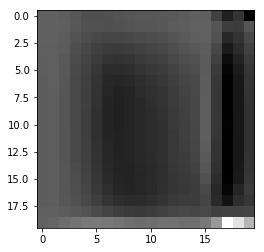

In [37]:
plt.imshow(x[1].reshape(20,20),cmap='gray')

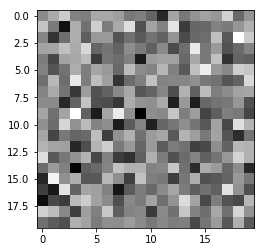

In [38]:
plt.imshow(y_test[1],cmap='gray')